In [1]:
# import tweepy
# import csv #Import csv
# auth = tweepy.auth.OAuthHandler('PvAvpX53z182ur75NXmiluukm', 'Lkd5NHqEX3mqt97jniRMWA9diQkPF3v18YWrDudZeg11ulGsnL')
# auth.set_access_token('1333764714841612290-tvEVqkCxcgFYSsyPjPqiWc8K4fsvsm', 'ykRra0mRQcpwkW0SfE10Mcnkq4UjiyqoCfvxNc16UZs0R')

# api = tweepy.API(auth,wait_on_rate_limit=True)

# # Open/create a file to append data to
# csvFile = open('dataset.csv', 'a',encoding="utf-8",newline='')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search,count=100000,
#                            q = "PlayStation",
#                            tweet_mode='extended',
#                            lang = "en").items():

#     # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])
#     print(tweet.full_text,tweet.user.screen_name,tweet.user.location)
# csvFile.close()

In [2]:
# Get the dataset 

(1600000, 2)


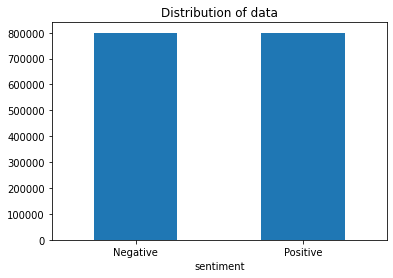

In [3]:
# Importing the dataset
import pandas as pd
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('CSV/training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])
print(dataset.shape)

In [4]:
dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
dataset.tail()

,sentiment,text
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
dataset = dataset.sample(frac=1).reset_index(drop=True)           #resetting index
dataset['len']=dataset["text"].str.len()                          #removing clipped tweets
df1= dataset[(dataset['len'] <=137)]
df2=dataset[(dataset['len'] >=150)]
dataset=pd.concat([df1,df2])                              
dataset = dataset.sample(frac=1).reset_index(drop=True)       #resetting index

In [8]:
dataset.shape

(1549911, 3)

In [9]:
dataset.head()

,sentiment,text,len
0,0,Getting Ready For Work.!,25
1,0,@sjes I HAD TO TELL SOMEONE. I'M SORRY,39
2,0,last day of recitles well there is 3 more and...,81
3,4,@varite I am thankful for that! Let's hope it ...,65
4,0,Brantford tourney all weekend!! Have to get up...,80


In [10]:
# convert text into lowercase

In [11]:
dataset['text'] = dataset['text'].str.lower()

print(dataset)

         sentiment                                               text  len
0                0                          getting ready for work.!    25
1                0            @sjes i had to tell someone. i'm sorry    39
2                0  last day of recitles  well there is 3 more and...   81
3                4  @varite i am thankful for that! let's hope it ...   65
4                0  brantford tourney all weekend!! have to get up...   80
...            ...                                                ...  ...
1549906          0  specs are a no go! got to send them off somewh...   50
1549907          0  livid at att right now for their cs and false ...  135
1549908          0                             its raining  *shivers*   22
1549909          0  felt really good after an hour of jogging! it'...   94
1549910          4  finally blogged again!  http://aniia.blogspot.com   49

[1549911 rows x 3 columns]


In [12]:
dataset.head()

,sentiment,text,len
0,0,getting ready for work.!,25
1,0,@sjes i had to tell someone. i'm sorry,39
2,0,last day of recitles well there is 3 more and...,81
3,4,@varite i am thankful for that! let's hope it ...,65
4,0,brantford tourney all weekend!! have to get up...,80


In [13]:
# cleaning the dataset

In [14]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):                                           #function to remove pattern 
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    dataset['text'] = dataset['text'].str.lower()
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         # removing RT @x from tweets:
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                             # removing  @xxx from tweets 
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")            # reremoving URL links http://xxx
    return lst

In [15]:
dataset['clean']= clean_tweets(dataset['text'])   #filtered texts kept in a new colum as clean

In [16]:
dataset.head()

,sentiment,text,len,clean
0,0,getting ready for work.!,25,getting ready for work.!
1,0,@sjes i had to tell someone. i'm sorry,39,i had to tell someone. i'm sorry
2,0,last day of recitles well there is 3 more and...,81,last day of recitles well there is 3 more and...
3,4,@varite i am thankful for that! let's hope it ...,65,i am thankful for that! let's hope it is quic...
4,0,brantford tourney all weekend!! have to get up...,80,brantford tourney all weekend!! have to get up...


In [17]:
dataset.tail(50)

,sentiment,text,len,clean
1549861,4,@sevenacross @sdkstl @alohajohn @kbhargava @st...,137,thanks for the inputs...working all righ...
1549862,0,@snobiwan yr makinâ me hungry thereâs no ...,69,yr makinâ me hungry thereâs no food in t...
1549863,4,art museum,11,art museum
1549864,4,http://twitpic.com/6quae - i want one please,45,- i want one please
1549865,0,can't sleep keep waking up,27,can't sleep keep waking up
1549866,4,watchin tv x,13,watchin tv x
1549867,4,@myelle911 cge. adtu ta nah. haha. is that th...,68,cge. adtu ta nah. haha. is that the trig res...
1549868,4,@livingvenice @aoifetweets thanks for the tips,47,thanks for the tips
1549869,0,"maddie is back home and doing very well, all t...",102,"maddie is back home and doing very well, all t..."
1549870,0,"@miss_melbourne ok , you win. i've cut the ch...",114,"ok , you win. i've cut the chocolate from my..."


In [18]:
#functions to identify sentiment for each text by vader

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer        
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05 :
        return 2
    elif (score['compound'] > -0.05) and (score['compound'] < 0.05) : 
        return 1 
    else :
        return 0

In [20]:
sentiments_using_vader = dataset.clean.apply(lambda text: sentiment_analyzer_scores(text))   #categorize each text into positive, negative and neutral
pd.DataFrame(sentiments_using_vader.value_counts())

,clean
2,719942
1,426493
0,403476


In [21]:
dataset['Prediction'] = sentiments_using_vader
dataset.head(50)

,sentiment,text,len,clean,Prediction
0,0,getting ready for work.!,25,getting ready for work.!,2
1,0,@sjes i had to tell someone. i'm sorry,39,i had to tell someone. i'm sorry,0
2,0,last day of recitles well there is 3 more and...,81,last day of recitles well there is 3 more and...,2
3,4,@varite i am thankful for that! let's hope it ...,65,i am thankful for that! let's hope it is quic...,2
4,0,brantford tourney all weekend!! have to get up...,80,brantford tourney all weekend!! have to get up...,2
5,0,"@lukesterluke , i can't! my toe is f'd up, can...",62,", i can't! my toe is f'd up, can't wear shoesss",1
6,4,sim 3 = not much difference from sims 2. not ...,124,sim 3 = not much difference from sims 2. not ...,2
7,0,"if you have an old injury,thought pain was sup...",129,"if you have an old injury,thought pain was sup...",0
8,0,stuck inside learnin stuff!? my head hurts,43,stuck inside learnin stuff!? my head hurts,0
9,0,but i think that it's over 100 cals,36,but i think that it's over 100 cals,1


In [22]:
dataset.describe()

,sentiment,len,Prediction
count,1.549911e+06,1.549911e+06,1.549911e+06
mean,2.003145e+00,7.196364e+01,1.204183e+00
std,1.999998e+00,3.501648e+01,8.265210e-01
min,0.000000e+00,6.000000e+00,0.000000e+00
25%,0.000000e+00,4.300000e+01,0.000000e+00
50%,4.000000e+00,6.700000e+01,1.000000e+00
75%,4.000000e+00,1.000000e+02,2.000000e+00
max,4.000000e+00,3.740000e+02,2.000000e+00


In [23]:
# replace letters in a string
dataset['clean'] = dataset['clean'].str.replace("[^a-zA-Z# ]", "")

In [24]:
dataset.head(50)

,sentiment,text,len,clean,Prediction
0,0,getting ready for work.!,25,getting ready for work,2
1,0,@sjes i had to tell someone. i'm sorry,39,i had to tell someone im sorry,0
2,0,last day of recitles well there is 3 more and...,81,last day of recitles well there is more and ...,2
3,4,@varite i am thankful for that! let's hope it ...,65,i am thankful for that lets hope it is quick ...,2
4,0,brantford tourney all weekend!! have to get up...,80,brantford tourney all weekend have to get up a...,2
5,0,"@lukesterluke , i can't! my toe is f'd up, can...",62,i cant my toe is fd up cant wear shoesss,1
6,4,sim 3 = not much difference from sims 2. not ...,124,sim not much difference from sims not sayi...,2
7,0,"if you have an old injury,thought pain was sup...",129,if you have an old injurythought pain was supp...,0
8,0,stuck inside learnin stuff!? my head hurts,43,stuck inside learnin stuff my head hurts,0
9,0,but i think that it's over 100 cals,36,but i think that its over cals,1


In [25]:
dataset.tail()

,sentiment,text,len,clean,Prediction
1549906,0,specs are a no go! got to send them off somewh...,50,specs are a no go got to send them off somewhere,0
1549907,0,livid at att right now for their cs and false ...,135,livid at att right now for their cs and false ...,0
1549908,0,its raining *shivers*,22,its raining shivers,1
1549909,0,felt really good after an hour of jogging! it'...,94,felt really good after an hour of jogging its ...,2
1549910,4,finally blogged again! http://aniia.blogspot.com,49,finally blogged again,1


In [26]:
import neattext.functions as nfx
import seaborn as sns
from collections import Counter



In [27]:
dataset.dtypes

sentiment      int64
text          object
len            int64
clean         object
Prediction     int64
dtype: object

In [28]:
dataset.isnull().sum()

sentiment     0
text          0
len           0
clean         0
Prediction    0
dtype: int64

In [53]:
from collections import Counter

def con(sentence):
    emotion_list = []
    sentence = sentence.split(' ')
    with open('emotions.txt','r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",",'').replace("'",'').strip()
            word, emotion = clear_line.split(':')

            if word in sentence:
                emotion_list.append(emotion)
        w = Counter(emotion_list)
        return w

In [55]:
dataset['emotion'] = dataset['clean'].apply(lambda x: con(x) )

In [57]:
dataset.head(50)

,sentiment,text,len,clean,Prediction,emotion
0,0,getting ready for work.!,25,getting ready for work,2,{}
1,0,@sjes i had to tell someone. i'm sorry,39,i had to tell someone im sorry,0,{}
2,0,last day of recitles well there is 3 more and...,81,last day of recitles well there is more and ...,2,{}
3,4,@varite i am thankful for that! let's hope it ...,65,i am thankful for that lets hope it is quick ...,2,{' happy': 1}
4,0,brantford tourney all weekend!! have to get up...,80,brantford tourney all weekend have to get up a...,2,{}
5,0,"@lukesterluke , i can't! my toe is f'd up, can...",62,i cant my toe is fd up cant wear shoesss,1,{}
6,4,sim 3 = not much difference from sims 2. not ...,124,sim not much difference from sims not sayi...,2,{}
7,0,"if you have an old injury,thought pain was sup...",129,if you have an old injurythought pain was supp...,0,{}
8,0,stuck inside learnin stuff!? my head hurts,43,stuck inside learnin stuff my head hurts,0,{}
9,0,but i think that it's over 100 cals,36,but i think that its over cals,1,{}


In [31]:
#split data into train and test

In [32]:
from sklearn.model_selection import train_test_split

x=dataset["clean"]
y=dataset["Prediction"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print(f'Data Split done.')
print("TRAIN size:", len(x_train))
print("TEST size:", len(x_train))
print("TRAIN size:", len(y_train))
print("TEST size:", len(y_test))

Data Split done.
TRAIN size: 1084937
TEST size: 1084937
TRAIN size: 1084937
TEST size: 464974


In [33]:
x_train

1065804    hi  oh noooooo  its been awhile forgot  but co...
1421780    at the quotexamquot they gave us  text one bei...
131446     my yo daughter is empathychallenged  its very ...
644442                                         back to work 
660975     hello oc havent been here in a while costa mes...
                                 ...                        
152315                                 lmfao ok thats a bet 
963395     patd amp fob amp blink in one concert dream co...
117952     i am seriousley craving mcdonalds but its too ...
1484405              haha who is there  i am doing homework 
305711        naw cheese is essential im gonna be nice yo...
Name: clean, Length: 1084937, dtype: object

In [34]:
x_test

787921              aww  i hate being cold when im sleeping 
404420      youre the best im sure that youre going to wi...
810523      she cant come apparently shes out with her si...
237048      just got up to get milk fo matthew me johnny ...
1450507    my trusty p with a broken quot lcd is not cutt...
                                 ...                        
373034                    hmm duno im not eating on me bill 
297763     want your house to be on hgtv contact me to fi...
1356569            ooh jodi i am will be lovely to meet you 
39387               soooo tied  need more sleep but soo busy
1024013    late night always comes too soon but bed time ...
Name: clean, Length: 464974, dtype: object

In [35]:
y_train

1065804    2
1421780    0
131446     0
644442     1
660975     1
          ..
152315     2
963395     2
117952     1
1484405    2
305711     2
Name: Prediction, Length: 1084937, dtype: int64

In [36]:
#Convert a collection of raw documents to a matrix of TF-IDF features.

In [37]:
y_test

787921     0
404420     2
810523     1
237048     2
1450507    2
          ..
373034     1
297763     2
1356569    2
39387      1
1024013    2
Name: Prediction, Length: 464974, dtype: int64

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [39]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)
print(f'Data Transformed.')

Data Transformed.


In [40]:
#train with your model and perform an anlaysis

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(x_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [42]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89    120790
           1       0.94      0.96      0.95    128209
           2       0.94      0.94      0.94    215975

    accuracy                           0.93    464974
   macro avg       0.93      0.93      0.93    464974
weighted avg       0.93      0.93      0.93    464974



ValueError: `data` and `annot` must have same shape.

In [ ]:
#save the vectoriser file and model file using pickle

In [43]:
import pickle
file = open('models and vec new/vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('models and vec new/Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [ ]:
#save the filtered csv

In [58]:
dataset.to_csv('models and vec new/training.1600000.processed.noemoticon-filtered-with-emo.csv')  

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
classifier.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [ ]:
#make predictions from manual input

In [45]:
predictions = classifier.predict(x_test)

In [ ]:
#get the dataset

In [62]:
file_name=('models and vec new/training.1600000.processed.noemoticon-filtered-with-emo.csv')
test=pd.read_csv(file_name)

In [47]:
test['clean']=clean_tweets(test['text']) 
test['clean']=test['clean'].str.replace("[^a-zA-Z ]", " ")

In [61]:
test.head(50)

,Unnamed: 0,sentiment,text,len,clean,Prediction
0,0,4,"@shadowmaat ooo, shall join you in coercing--e...",82,ooo shall join you in coercing er persuadi...,2
1,1,0,it's 90 degrees here at the ranch this morning...,61,it s degrees here at the ranch this morning...,2
2,2,4,my kitteh sleeps on the ironing board while i ...,121,my kitteh sleeps on the ironing board while i ...,1
3,3,4,@blissneso i voted 10 of your songs,36,i voted of your songs,1
4,4,0,omg. he said he needs to think. single kat may...,54,omg he said he needs to think single kat may...,1
5,5,0,was fenna go 2 church but it's raining. can't...,80,was fenna go church but it s raining can t...,1
6,6,0,interesting chat today. what does someone from...,130,interesting chat today what does someone from...,2
7,7,4,@saundy83 happy birthday!,26,happy birthday,2
8,8,0,yawn yawn yawn! i heavy want a dominos,39,yawn yawn yawn i heavy want a dominos,2
9,9,4,"@fenderlove in reply to cds. you'll love him, ...",135,in reply to cds you ll love him them even m...,2


In [ ]:
# for i,tweet in enumerate(test['clean']):
#     op=classifier.predict(vectoriser.transform([tweet]).toarray())
#     if op == [0]:
#         print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEGATIVE','\n')
#     if op == [1]:
#         print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEUTRAL','\n')
#     if op == [2]:
#         print(i,")"," ' ",test.text[i]," ' ",'\n','=','POSITIVE','\n')

In [79]:
tweet="I want my Samsung back 😐😐 "
clean=clean_tweets(tweet)
clean=str(clean)
clean=re.sub('[^a-zA-Z]', ' ',clean )
clean=[clean]
op=classifier.predict(vectoriser.transform(clean).toarray())
if op == [0]:
    print(tweet,'\n','=','NEGATIVE','\n')
if op == [1]:
    print(tweet,'\n','=','NEUTRAL','\n')
if op == [2]:
    print(tweet,'\n','=','POSITIVE','\n')

I want my Samsung back 😐😐  
 = POSITIVE 



In [63]:
dataset.head(50)

,sentiment,text,len,clean,Prediction,emotion
0,0,getting ready for work.!,25,getting ready for work,2,{}
1,0,@sjes i had to tell someone. i'm sorry,39,i had to tell someone im sorry,0,{}
2,0,last day of recitles well there is 3 more and...,81,last day of recitles well there is more and ...,2,{}
3,4,@varite i am thankful for that! let's hope it ...,65,i am thankful for that lets hope it is quick ...,2,{' happy': 1}
4,0,brantford tourney all weekend!! have to get up...,80,brantford tourney all weekend have to get up a...,2,{}
5,0,"@lukesterluke , i can't! my toe is f'd up, can...",62,i cant my toe is fd up cant wear shoesss,1,{}
6,4,sim 3 = not much difference from sims 2. not ...,124,sim not much difference from sims not sayi...,2,{}
7,0,"if you have an old injury,thought pain was sup...",129,if you have an old injurythought pain was supp...,0,{}
8,0,stuck inside learnin stuff!? my head hurts,43,stuck inside learnin stuff my head hurts,0,{}
9,0,but i think that it's over 100 cals,36,but i think that its over cals,1,{}
